## Introduction

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| Required to import, and briefly discuss, the libraries that will be used throughout analysis and modelling. |

---

In [185]:
from comet_ml import Experiment
from comet_ml.integration.sklearn import log_model

experiment = Experiment(
  api_key="hbu6nFnbDgCuG2gKUAdO3w4D2",
  project_name="classification-sprint-team-jm5",
  workspace="gzukhanye-gmail-com"
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: tensorboard, tensorflow, sklearn, keras.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/gzukhanye-gmail-com/classification-sprint-team-jm5/ce1b291ef2ad489b9b6a46ac9bfaace5



COMET ERROR: Error sending metrics batch (online experiment)
COMET ERROR: Heartbeat processing error


In [127]:
import nltk
from nltk import FreqDist, bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [128]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns  # For enhanced data visualization
import re
import nltk
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42 ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| Load the data from the `train and test` file into a DataFrame. |

---

In [129]:
# loaded the data from the df file as a dataFrame
df_train = pd.read_csv("train.csv") 
df_test = pd.read_csv("test.csv")

In [130]:
df_train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| Perform an in-depth analysis of all the variables in the DataFrame. |

---


In [131]:
#displays the number of rows and columns 
df_train.shape
df_test.shape

(10546, 2)

In [132]:
''''
Displays info about the columns
'message' is categorical whereas
'tweetId' & 'sentiment' are numerical
'''
df_train.info()
print("\n")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


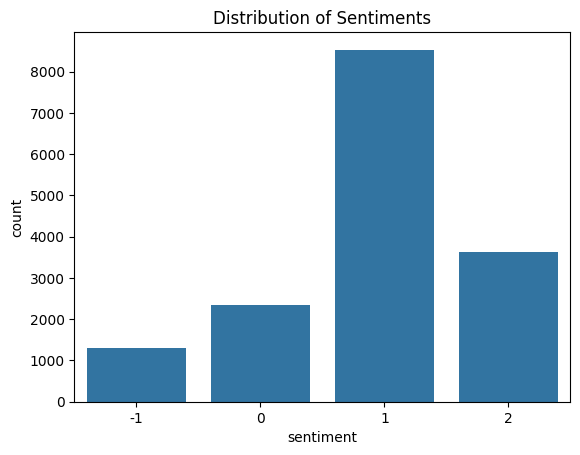

In [133]:
'''
The distribution of classes in 'sentiment'
1(reference class) has the highest distribution
'''

sns.countplot(x='sentiment', data=df_train)
plt.title('Distribution of Sentiments')
plt.show()

#### Tweet Data Analysis

1. Average length of tweets

In [134]:
# Analyze the characteristics of the tweet text
df_train['tweet_length'] = df_train['message'].apply(len)

2. Distribution of tweet length

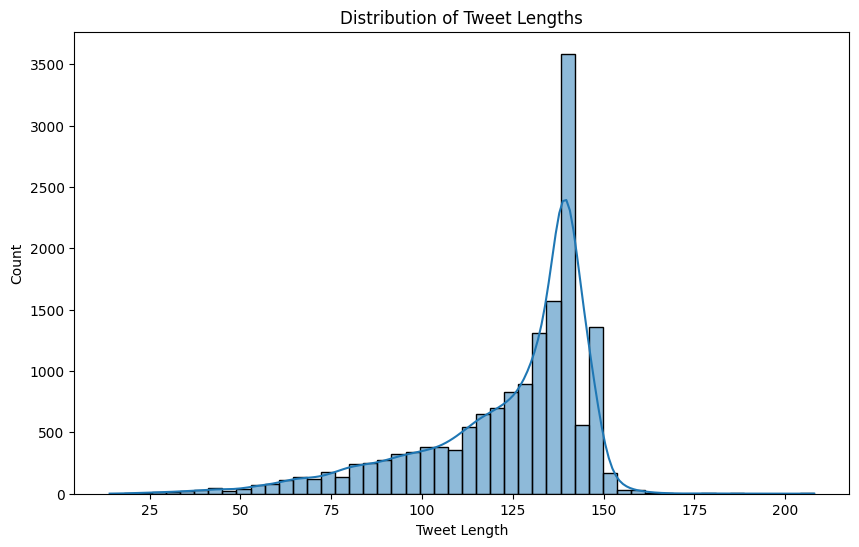

In [135]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['tweet_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.show()

3. Common words and phrases

In [136]:
'''
Concatenates the all the tweets into a single string
and tokenises the text into individual words and
outputs the most common words & its frequencies
'''
all_text = ' '.join(df_train['message'].astype(str))

tokens = word_tokenize(all_text)
fdist = FreqDist(tokens)
common_words = fdist.most_common(10)
print("Common Words:", common_words)

bi_grams = list(bigrams(tokens))
bi_gram_freq = FreqDist(bi_grams)
common_bigrams = bi_gram_freq.most_common(10)
print("Common Bigrams:", common_bigrams)

Common Words: [(':', 22517), ('@', 14835), ('climate', 12607), ('change', 12332), ('https', 10001), ('RT', 9717), ('.', 7283), ('to', 7083), ('the', 6421), (',', 6152)]
Common Bigrams: [(('climate', 'change'), 12006), (('https', ':'), 10001), (('RT', '@'), 9616), (('global', 'warming'), 3287), (('change', '.'), 1391), (('change', 'https'), 1342), (('on', 'climate'), 1171), (('change', 'is'), 1166), (('.', 'https'), 1061), (('&', 'amp'), 940)]


4. WordCloud

Text(0.5, 1.0, 'WordCloud for Positive Sentiments')

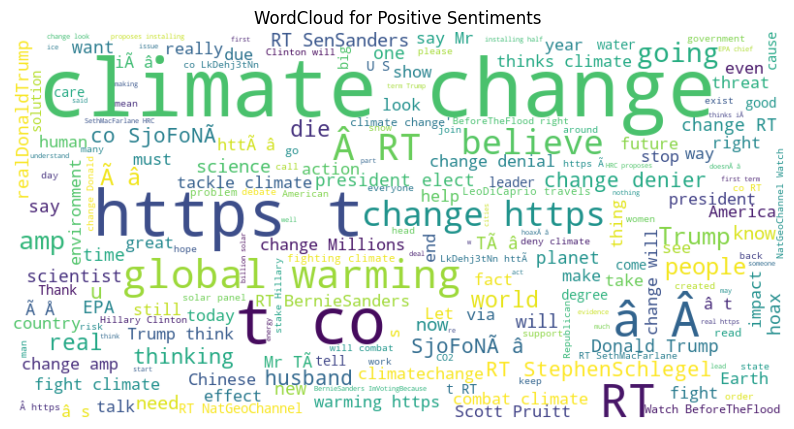

In [137]:
'''
WordCloud: data visualization technique used for representing text data
in which the size of each word indicates its frequency or importance.
widely used for analyzing data from social network websites. (Twitter)
1 is the reference class(people who are in support of climate change)
'''

positive_tweets = df_train[df_train['sentiment'] == 1]['message'].values
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets))
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Sentiments')

5. Verify for any null values

In [138]:
df_train.isnull().sum()
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| Clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [139]:
df_train.head()

,sentiment,message,tweetid,tweet_length
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140
1,1,It's not like we lack evidence of anthropogeni...,126103,62
2,2,RT @RawStory: Researchers say we have three ye...,698562,140
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122


In [140]:
# Check for missing values
print("Missing values in df_train:\n", df_train.isnull().sum())
print("Missing values in df_test:\n", df_test.isnull().sum())

Missing values in df_train:
 sentiment       0
message         0
tweetid         0
tweet_length    0
dtype: int64
Missing values in df_test:
 message    0
tweetid    0
dtype: int64


In [141]:
print(df_test.info)

<bound method DataFrame.info of                                                  message  tweetid
0      Europe will now be looking to China to make su...   169760
1      Combine this with the polling of staffers re c...    35326
2      The scary, unimpeachable evidence that climate...   224985
3      @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4      RT @FakeWillMoore: 'Female orgasms cause globa...   872928
...                                                  ...      ...
10541  RT @BrittanyBohrer: Brb, writing a poem about ...   895714
10542  2016: the year climate change came home: Durin...   875167
10543  RT @loop_vanuatu: Pacific countries positive a...    78329
10544  RT @xanria_00018: You’re so hot, you must be t...   867455
10545  RT @chloebalaoing: climate change is a global ...   470892

[10546 rows x 2 columns]>


In [142]:
# Function to clean the message column
def clean_text(text):
    # Remove mentions (@user), URLs, and special characters
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    
    text = text.lower()
    
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in tokens]
    
    # Join the filtered words back into a sentence
    text = ' '.join(filtered_text)
    return text



In [143]:
df_train['cleaned_message'] = df_train['message'].apply(clean_text)

In [144]:
df_test['cleaned_message'] = df_test['message'].apply(clean_text)

In [145]:
df_train

,sentiment,message,tweetid,tweet_length,cleaned_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140,polyscimajor epa chief doesnt think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,62,its not like we lack evidence of anthropogenic...
2,2,RT @RawStory: Researchers say we have three ye...,698562,140,rt researchers say we have three years to act ...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,todayinmaker wired was a pivotal year in the w...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,rt its and a racist sexist climate change deny...
...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,140,rt they took down the material on global warmi...
15815,2,RT @washingtonpost: How climate change could b...,17856,119,rt how climate change could be breaking up a m...
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,133,notiven rt nytimesworld what does trump actual...
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,128,rt hey liberals the climate change crap is a h...


In [146]:
df_train

,sentiment,message,tweetid,tweet_length,cleaned_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140,polyscimajor epa chief doesnt think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,62,its not like we lack evidence of anthropogenic...
2,2,RT @RawStory: Researchers say we have three ye...,698562,140,rt researchers say we have three years to act ...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,todayinmaker wired was a pivotal year in the w...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,rt its and a racist sexist climate change deny...
...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,140,rt they took down the material on global warmi...
15815,2,RT @washingtonpost: How climate change could b...,17856,119,rt how climate change could be breaking up a m...
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,133,notiven rt nytimesworld what does trump actual...
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,128,rt hey liberals the climate change crap is a h...


In [147]:
print(df_train.columns)

Index(['sentiment', 'message', 'tweetid', 'tweet_length', 'cleaned_message'], dtype='object')


In [148]:
df_train = df_train.drop('message', axis=1)

In [149]:
df_train

,sentiment,tweetid,tweet_length,cleaned_message
0,1,625221,140,polyscimajor epa chief doesnt think carbon dio...
1,1,126103,62,its not like we lack evidence of anthropogenic...
2,2,698562,140,rt researchers say we have three years to act ...
3,1,573736,99,todayinmaker wired was a pivotal year in the w...
4,1,466954,122,rt its and a racist sexist climate change deny...
...,...,...,...,...
15814,1,22001,140,rt they took down the material on global warmi...
15815,2,17856,119,rt how climate change could be breaking up a m...
15816,0,384248,133,notiven rt nytimesworld what does trump actual...
15817,-1,819732,128,rt hey liberals the climate change crap is a h...


In [150]:
df_test = df_test.drop('message', axis=1)

In [151]:
df_test.head()

,tweetid,cleaned_message
0,169760,europe will now be looking to china to make su...
1,35326,combine this with the polling of staffers re c...
2,224985,the scary unimpeachable evidence that climate ...
3,476263,putin got to you too jill trump doesnt believe...
4,872928,rt female orgasms cause global warming sarcast...


In [152]:
words = df_train['cleaned_message']

In [153]:
df_train

,sentiment,tweetid,tweet_length,cleaned_message
0,1,625221,140,polyscimajor epa chief doesnt think carbon dio...
1,1,126103,62,its not like we lack evidence of anthropogenic...
2,2,698562,140,rt researchers say we have three years to act ...
3,1,573736,99,todayinmaker wired was a pivotal year in the w...
4,1,466954,122,rt its and a racist sexist climate change deny...
...,...,...,...,...
15814,1,22001,140,rt they took down the material on global warmi...
15815,2,17856,119,rt how climate change could be breaking up a m...
15816,0,384248,133,notiven rt nytimesworld what does trump actual...
15817,-1,819732,128,rt hey liberals the climate change crap is a h...


In [154]:
lemmatizer = WordNetLemmatizer()

In [155]:
#def twitter_lemma(words, lemmatizer):
    #return [lemmatizer.lemmatize(word) for word in words]

In [156]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

df_train['processed_tokens'] = df_train['cleaned_message'].apply(preprocess_text)

# Tokenize, stem, and lemmatize 'cleaned_message' column in df_test
df_test['processed_tokens'] = df_test['cleaned_message'].apply(preprocess_text)


In [157]:
#df_train['lemma'] = df_train['cleaned_message'].apply(twitter_lemma, args=(lemmatizer, ))

In [158]:
#for i, t in enumerate(df_train.iloc[10000]['cleaned_message'].split()):
    #print('{:20s} --> {:10s}'.format(t, df_train.iloc[10000]['lemma'][i]))

In [159]:
# Create bag-of-words representation using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train['processed_tokens'].apply(lambda x: ' '.join(x)))
X_test = vectorizer.transform(df_test['processed_tokens'].apply(lambda x: ' '.join(x)))


In [160]:
# Convert the bag-of-words representation to a DataFrame
bow_df_train = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
bow_df_test = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

In [161]:
print(df_test.columns)

Index(['tweetid', 'cleaned_message', 'processed_tokens'], dtype='object')


In [162]:
df_test

,tweetid,cleaned_message,processed_tokens
0,169760,europe will now be looking to china to make su...,"[europ, look, china, make, sure, alon, fight, ..."
1,35326,combine this with the polling of staffers re c...,"[combin, poll, staffer, climat, chang, woman, ..."
2,224985,the scary unimpeachable evidence that climate ...,"[scari, unimpeach, evid, climat, chang, alread..."
3,476263,putin got to you too jill trump doesnt believe...,"[putin, got, jill, trump, doesnt, believ, clim..."
4,872928,rt female orgasms cause global warming sarcast...,"[rt, femal, orgasm, caus, global, warm, sarcas..."
...,...,...,...
10541,895714,rt brb writing a poem about climate change cli...,"[rt, brb, write, poem, climat, chang, climatec..."
10542,875167,the year climate change came home during the h...,"[year, climat, chang, came, home, hottest, yea..."
10543,78329,rt pacific countries positive about fiji leadi...,"[rt, pacif, countri, posit, fiji, lead, global..."
10544,867455,rt youre so hot you must be the cause for glob...,"[rt, your, hot, must, caus, global, warm, aldu..."


In [163]:
df_train

,sentiment,tweetid,tweet_length,cleaned_message,processed_tokens
0,1,625221,140,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,126103,62,its not like we lack evidence of anthropogenic...,"[like, lack, evid, anthropogen, global, warm]"
2,2,698562,140,rt researchers say we have three years to act ...,"[rt, research, say, three, year, act, climat, ..."
3,1,573736,99,todayinmaker wired was a pivotal year in the w...,"[todayinmak, wire, pivot, year, war, climat, c..."
4,1,466954,122,rt its and a racist sexist climate change deny...,"[rt, racist, sexist, climat, chang, deni, bigo..."
...,...,...,...,...,...
15814,1,22001,140,rt they took down the material on global warmi...,"[rt, took, materi, global, warm, lgbt, right, ..."
15815,2,17856,119,rt how climate change could be breaking up a m...,"[rt, climat, chang, could, break, millionyearo..."
15816,0,384248,133,notiven rt nytimesworld what does trump actual...,"[notiven, rt, nytimesworld, trump, actual, bel..."
15817,-1,819732,128,rt hey liberals the climate change crap is a h...,"[rt, hey, liber, climat, chang, crap, hoax, ti..."


In [164]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [165]:
cleaned_message = {}
for pp in words:
    df_t = df_train.groupby('cleaned_message')
    cleaned_message[pp] = {}
    for row in df_t.get_group(pp)['cleaned_message']:
        cleaned_message[pp] = bag_of_words_count(row, cleaned_message[pp])

In [166]:
all_words = set()
for pp in words:
    for word in cleaned_message[pp]:
        all_words.add(word)

In [167]:
cleaned_message['all'] = {}
for pp in words:
    for word in all_words:
        if word in cleaned_message[pp].keys():
            if word in cleaned_message['all']:
                cleaned_message['all'][word] += cleaned_message[pp][word]
            else:
                cleaned_message['all'][word] = cleaned_message[pp][word]

In [168]:
total_words = sum([v for v in cleaned_message['all'].values()])
total_words

15473055

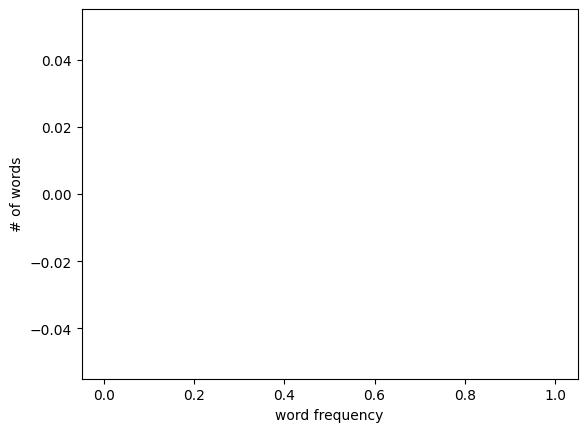

In [169]:
import matplotlib.pyplot as plt

# Assuming cleaned_message is a dictionary with word frequencies for a specific category, like 'all'
word_frequencies = cleaned_message['all'].values()

plt.hist([v for v in word_frequencies if v < 10], bins=10, density=False)
plt.ylabel("# of words")
plt.xlabel("word frequency")
plt.show()


In [170]:
len([v for v in cleaned_message['all'].values() if v < 2000])


1

In [171]:
from collections import Counter

# Assuming 'cleaned_message' is a column in your DataFrame
words = df_train['cleaned_message'].str.split().explode()

# Count occurrences of each word
word_counts = Counter(words)

# Filter out rare words
rare_words = [word for word, count in word_counts.items() if count < 2000]

print(rare_words[:100])


['polyscimajor', 'epa', 'chief', 'doesnt', 'think', 'carbon', 'dioxide', 'main', 'cause', 'wait', 'what', 'via', 'its', 'not', 'like', 'we', 'lack', 'evidence', 'anthropogenic', 'researchers', 'say', 'have', 'three', 'years', 'act', 'before', 'too', 'late', 'todayinmaker', 'wired', 'was', 'pivotal', 'year', 'war', 'racist', 'sexist', 'denying', 'bigot', 'leading', 'polls', 'electionnight', 'worth', 'read', 'whether', 'you', 'do', 'or', 'dont', 'believe', 'mike', 'pence', 'that', 'smoking', 'causes', 'lung', 'cancer', 'six', 'big', 'things', 'can', 'all', 'today', 'fight', 'how', 'be', 'activist', 'h', 'my', 'yo', 'nephew', 'inconsolable', 'he', 'wants', 'die', 'old', 'age', 'me', 'but', 'will', 'perish', 'fiery', 'hellscape', 'no', 'offense', 'just', 'shes', 'thinking', 'about', 'going', 'because', 'your', 'husband', 'i', 'hope', 'people', 'who', 'are', 'vocal', 'also', 'powering']


In [172]:
# how many words appear more than 10 times?
# how many words of the total does that account for?
print(len([v for v in cleaned_message['all'].values() if v >= 10]))
occurs_more_than_10_times = sum([v for v in cleaned_message['all'].values() if v >= 10])
print(occurs_more_than_10_times)

27
15473055


In [173]:
words_10 = 27

In [174]:
words_10/occurs_more_than_10_times

1.744968915317628e-06

In [175]:
most_frequent_word = max(cleaned_message['all'], key=cleaned_message['all'].get)
print("Most frequent word:", most_frequent_word)
print("Number of occurrences:", cleaned_message['all'][most_frequent_word])


Most frequent word:  
Number of occurrences: 2573007


In [176]:
# Remove empty strings from the dictionary
#cleaned_message_no_empty = {k: v for k, v in cleaned_message['all'].items() if k.strip()}

# Find the most frequent word with more than one character
#most_frequent_word = max(cleaned_message_no_empty, key=lambda k: cleaned_message_no_empty[k] if cleaned_message_no_empty[k] > 1 else 0)

# Print the result
#print("Most frequent word:", most_frequent_word)
#print("Number of occurrences:", cleaned_message_no_empty[most_frequent_word])


In [177]:
# Remove empty strings from the dictionary
cleaned_message_no_empty = {k: v for k, v in cleaned_message['all'].items() if k.strip()}

# Find the most frequent word with more than one character
sorted_words = sorted(cleaned_message_no_empty.items(), key=lambda x: x[1], reverse=True)
most_frequent_word, occurrences = sorted_words[0]

# Print the result
print("Most frequent word:", most_frequent_word)
print("Number of occurrences:", occurrences)


Most frequent word: e
Number of occurrences: 1728075


In [178]:
# Assuming 'cleaned_message' column contains your text data
df_train['processed_tokens'] = df_train['cleaned_message'].apply(preprocess_text)
df_test['processed_tokens'] = df_test['cleaned_message'].apply(preprocess_text)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| Create one or more classification models that are able to accurately predict |

---

In [179]:
## RUN THIS FIRST
# Convert processed tokens to text
df_train['processed_text'] = df_train['processed_tokens'].apply(lambda tokens: ' '.join(tokens))
df_test['processed_text'] = df_test['processed_tokens'].apply(lambda tokens: ' '.join(tokens))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['processed_text'], df_train['sentiment'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [180]:
# Convert text to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_text)  # Fit only on training data

# The word_index contains the mapping of words to unique integers
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for the reserved index 0

# ...


In [181]:
#RUN THIS FIRST

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df_train is your training DataFrame with a 'processed_tokens' column
texts = df_train['processed_tokens']

# Join the list of processed tokens into a single string
X_train_text = [' '.join(tokens) for tokens in X_train]
X_test_text = [' '.join(tokens) for tokens in X_test]

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.9)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)


# Convert text to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_text)  # Fit only on training data

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

# Pad sequences to a fixed length
max_len = max(max(len(seq) for seq in X_train_seq), max(len(seq) for seq in X_test_seq))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(Conv1D(256, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Use a lower learning rate and add a learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print(f"Test Accuracy: {accuracy}")




ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
X = df_train['cleaned_message']
y = df_train['sentiment']

In [ ]:
#from sklearn.model_selection import train_test_split
#split data into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [182]:
# Create an instance of the Tokenizer class
tokenizer = Tokenizer()

# Fit on training data
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [183]:
# Print a few samples of the tokenized text
for i in range(5):
    print(X_train_text[i])

a l j a z e e r a   e n g l i s h   h d l i v e s t r e a m c l i m   s o   i n n o v   t e c h n o l o g   t a c k l   c l i m a t   c h a n g
r t   t i l l e r s o n   m o v e   e l i m i n   l e a s t   s p e c i a l   e n v o y   p o s i t   s t a t e i n c l u d   r e p   c l i m a t   c h a n g
r t   s h o w   t e r r i f y i n g l i   a l a r m   p h o t o   a n y b o d i   d o e s n t   b e l i e v   c l i m a t   c h a n g
r t   m a j o r   r e p u b l i c a n   h o u s   s e n a t   c l i m a t   c h a n g   d e n i e r
c l i m a t e n p   m a n   s t u p i d   p o w e r   m u s i c   m e s s a g   c l i m a t   c h a n g   c o w r i t t e n   g o r i l l a


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| Compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---